In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('BreastCancerData4.csv')

In [3]:
data.head()

,Age,BMI,BreastFeeding,Marital Status,Alcohol,Smoking,BreastCancerHistory,Age at firstPeriod,MenstrualCycle,Cancer Positive
0,48,8.543723,1,1,0,0,0,15,1,0
1,31,10.204207,1,1,0,0,0,12,1,0
2,31,13.807133,1,1,0,0,0,14,1,0
3,33,14.088867,1,1,1,0,0,12,1,0
4,49,14.494061,1,1,0,0,0,15,1,0


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
data.columns

Index(['Age', 'BMI', 'BreastFeeding', 'Marital Status', 'Alcohol', 'Smoking',
       'BreastCancerHistory', 'Age at firstPeriod', 'MenstrualCycle',
       'Cancer Positive'],
      dtype='object')

In [6]:
X = data[['Age', 'BMI', 'BreastFeeding', 'Marital Status', 'Alcohol', 'Smoking',
       'BreastCancerHistory', 'Age at firstPeriod', 'MenstrualCycle']]
y = data[['Cancer Positive']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2388 entries, 0 to 2387
Data columns (total 10 columns):
Age                    2388 non-null int64
BMI                    2388 non-null float64
BreastFeeding          2388 non-null int64
Marital Status         2388 non-null int64
Alcohol                2388 non-null int64
Smoking                2388 non-null int64
BreastCancerHistory    2388 non-null int64
Age at firstPeriod     2388 non-null int64
MenstrualCycle         2388 non-null int64
Cancer Positive        2388 non-null int64
dtypes: float64(1), int64(9)
memory usage: 186.7 KB


In [8]:
data.describe()

,Age,BMI,BreastFeeding,Marital Status,Alcohol,Smoking,BreastCancerHistory,Age at firstPeriod,MenstrualCycle,Cancer Positive
count,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000
mean,41.029313,24.723056,0.891122,1.126466,0.351340,0.154941,0.029313,13.104690,0.781826,0.404523
std,7.694522,4.939623,0.311551,0.455754,0.477489,0.361925,0.168718,1.684577,0.413093,0.490902
min,21.000000,8.543723,0.000000,1.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000
25%,35.000000,21.168699,1.000000,1.000000,0.000000,0.000000,0.000000,12.000000,1.000000,0.000000
50%,41.000000,24.453841,1.000000,1.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000
75%,48.000000,27.657793,1.000000,1.000000,1.000000,0.000000,0.000000,14.000000,1.000000,1.000000
max,54.000000,69.500000,1.000000,3.000000,1.000000,1.000000,1.000000,21.000000,1.000000,1.000000


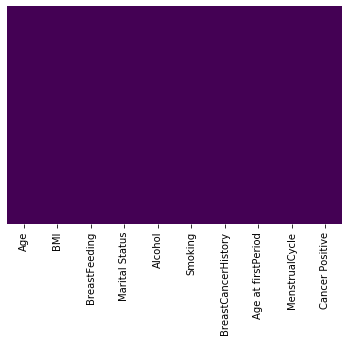

In [9]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

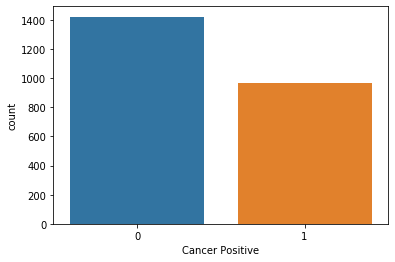

In [10]:
sns.countplot(x='Cancer Positive',data=data)

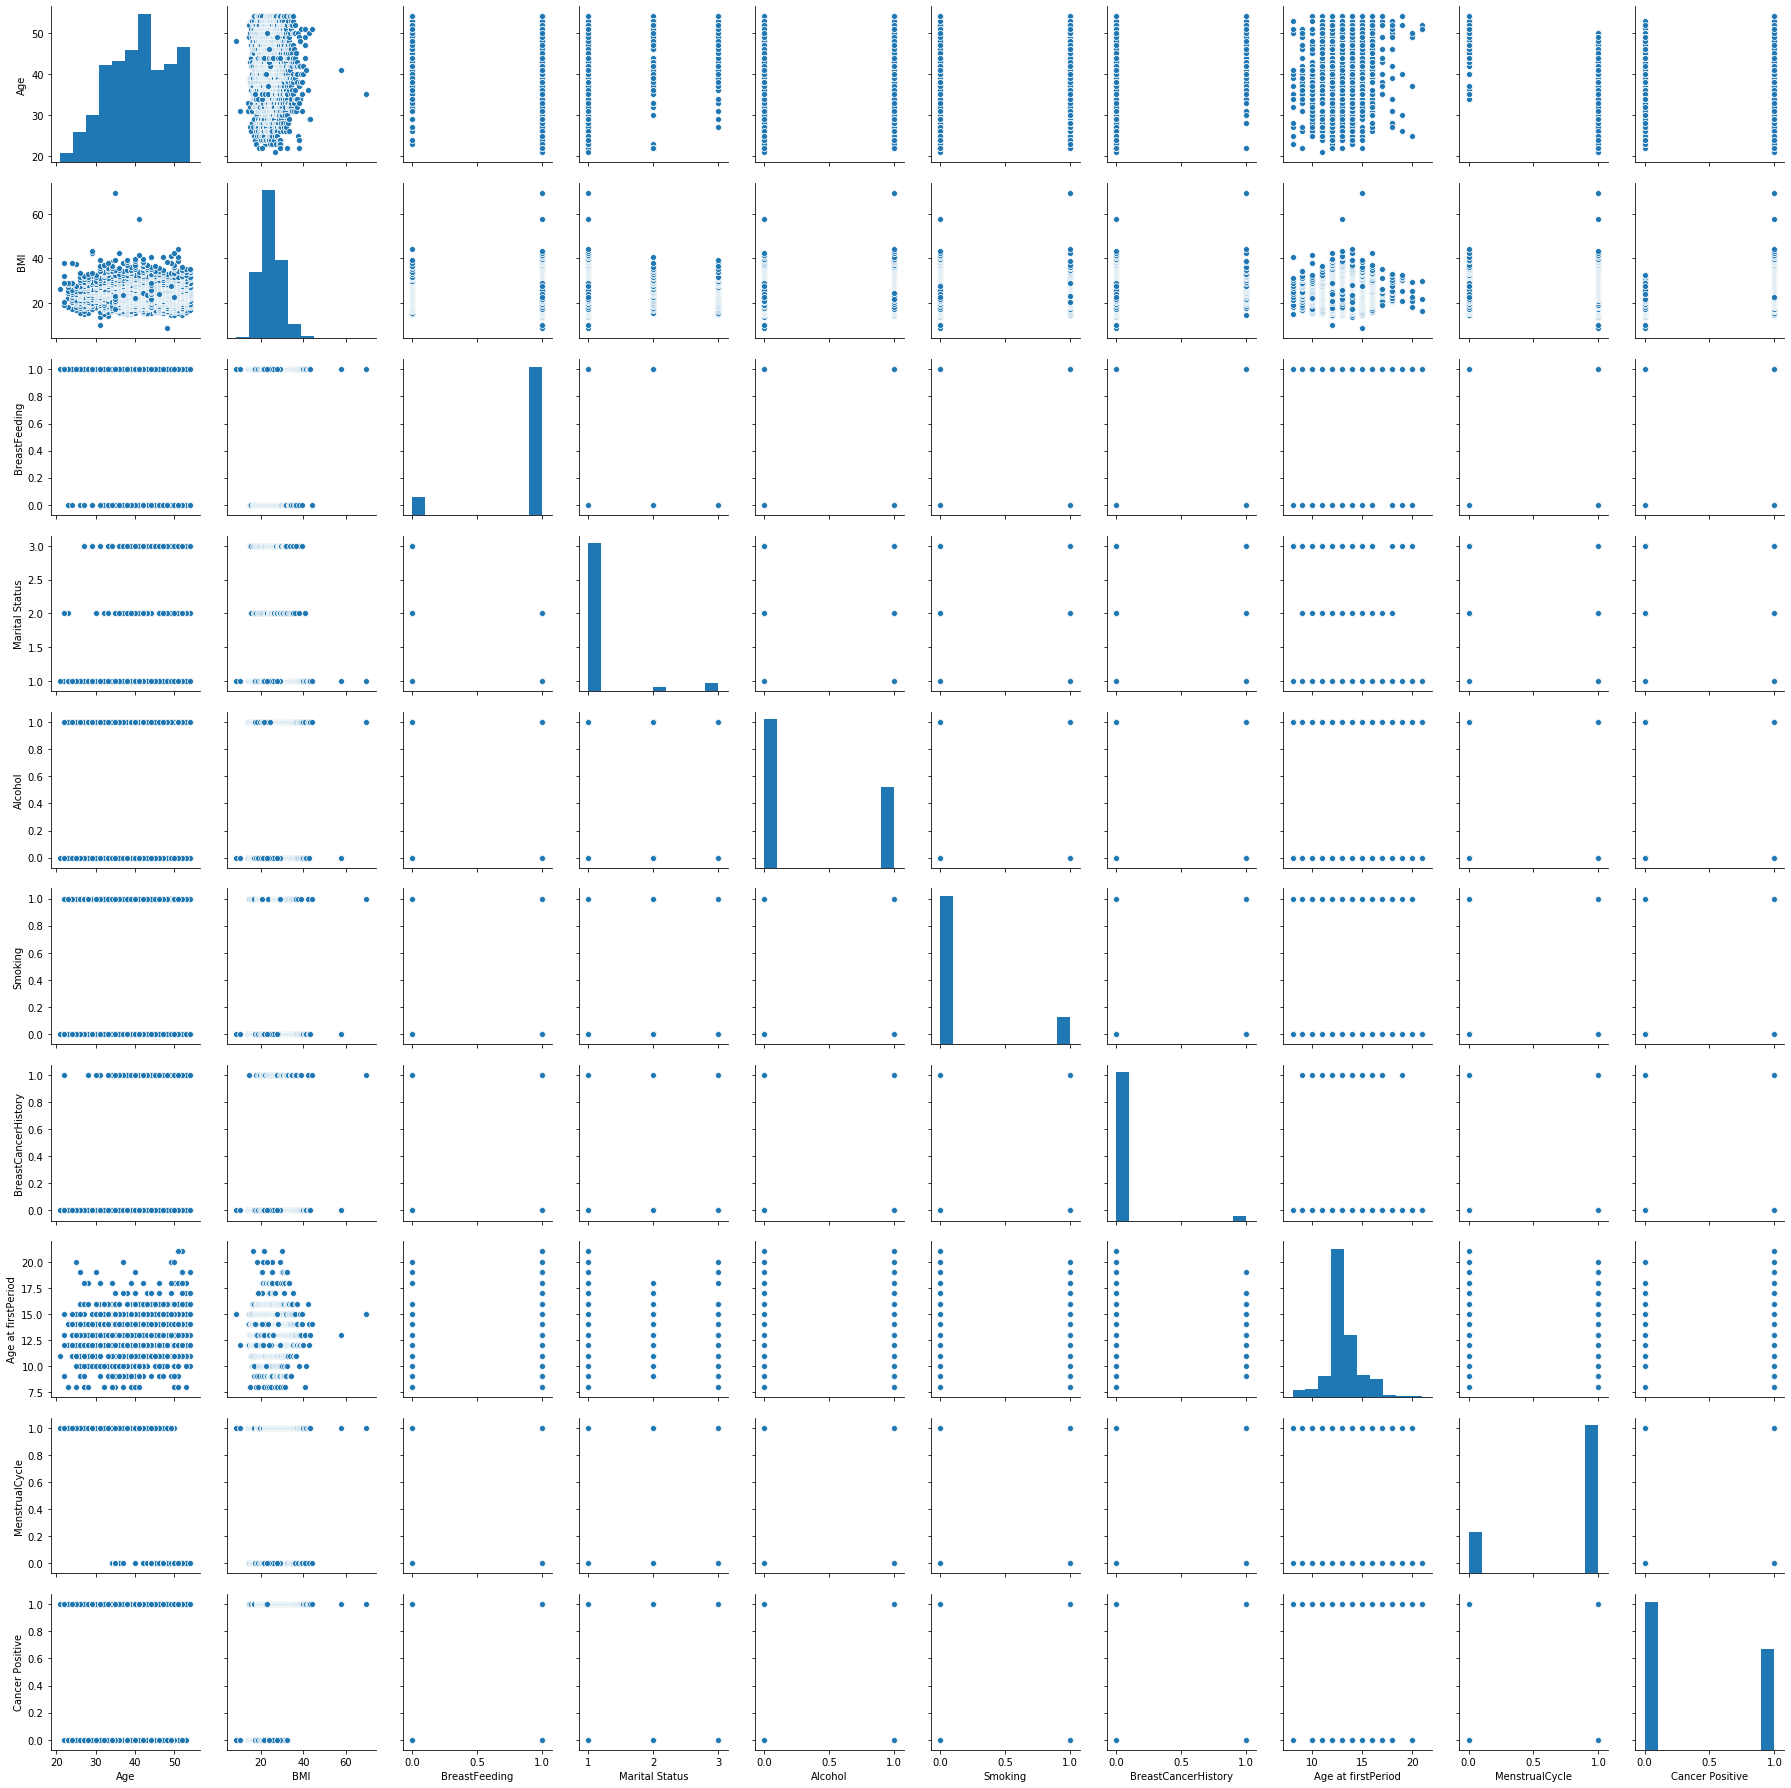

In [12]:
sns.pairplot(data)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lean = LinearRegression()

In [15]:
lean.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
predictions = lean.predict(X_test)

In [17]:
predictions

array([[ 1.92519976e-01],
       [ 1.04444329e+00],
       [ 3.54739224e-01],
       [ 8.37985634e-01],
       [ 6.77251875e-01],
       [-1.27985980e-01],
       [ 3.04128097e-02],
       [ 6.69235792e-01],
       [ 8.10173358e-01],
       [-4.38284238e-02],
       [ 9.43534819e-01],
       [ 4.25862961e-01],
       [ 3.34892199e-02],
       [ 3.52464506e-01],
       [-4.08901023e-02],
       [ 5.45752915e-01],
       [ 1.67539758e-01],
       [ 5.87009255e-01],
       [-1.17545916e-03],
       [ 1.36952857e-01],
       [ 4.00616484e-01],
       [ 9.13692352e-01],
       [ 5.89254995e-01],
       [ 4.77396241e-01],
       [ 1.12447737e-01],
       [-3.06721495e-02],
       [ 1.98302228e-01],
       [ 4.63636392e-01],
       [ 6.35649326e-01],
       [ 9.81043323e-01],
       [ 7.03080504e-01],
       [-2.19559717e-02],
       [ 3.00825588e-01],
       [ 1.98477398e-01],
       [ 4.61441198e-01],
       [ 7.75889766e-01],
       [ 2.34256222e-01],
       [ 5.24044783e-01],
       [ 9.9

In [18]:
y_test

,Cancer Positive
544,0
1911,1
1493,0
2383,1
744,1
...,...
1138,0
1422,0
1550,0
2116,1


In [20]:
import joblib as jb

In [27]:
jb.dump(lean,'modellinear.pkl')

['modellinear.pkl']

In [28]:
model = jb.load('modellinear.pkl')

In [29]:
print(model.predict([[48,1972,70,140,35.7,1,1,2,2,1,17,1]]))

ValueError: shapes (1,12) and (9,1) not aligned: 12 (dim 1) != 9 (dim 0)